#### A quick demo to illustrate the performance of Multi-Embed on TNBC ST samples

##### Download the result pickle file first.
https://drive.google.com/file/d/1IP7_9_vhtPvTMPbNfXCA-57ho-wRkpJc/view?usp=sharing

In [2]:
import pickle as pkl
import numpy as np

with open('../save/st/CN15_D2/tnbc_sr.pkl', 'rb') as file:
    val_res = pkl.load(file)
image_mat = np.concatenate(val_res['images'], axis=0)
x_list, y_list = [], []
for sample_name in val_res['names']:
    # print(sample_name)
    x, y = sample_name.split('_')[-1].split('x')
    x_list.append(int(x))
    y_list.append(int(y))

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(image_mat)
coords_scaled = scaler.fit_transform(np.array([x_list, y_list]).T)

combined_data = np.hstack((features_scaled, coords_scaled))
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(combined_data)

##### TLS region

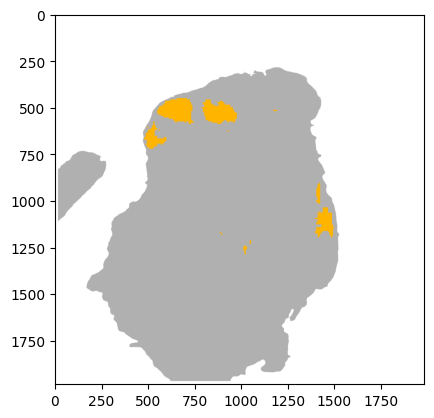

In [6]:
import cv2
from matplotlib import pyplot as plt

mask = cv2.imread('../save/tnbc/mask-small.png', flags=0)
height, width = mask.shape
meta_image = np.ones((height, width, 3), dtype=np.uint8) * 255

meta_image[mask == 255] = [176, 176, 176]
# plt.imshow(meta_image)
image = np.ones((284, 284, 3)) * 255
target_color = np.array([255, 180, 0])
for x, y, label in zip(x_list, y_list, kmeans_labels):
    resize_x, resize_y = x // 112, y // 112
    if label == 2:
        image[resize_y, resize_x, :] = target_color
image = cv2.resize(image, (1984, 1984))
tls_mask = np.all(image == target_color, axis=-1)
meta_image[tls_mask] = image[tls_mask]
plt.imshow(meta_image)

##### Cluster

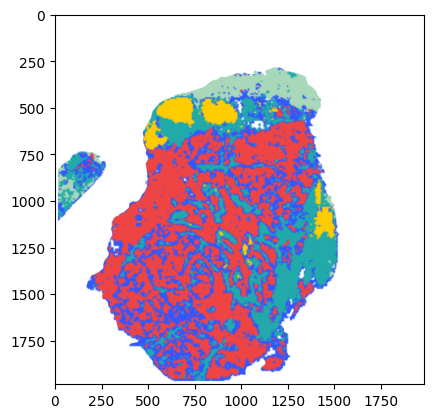

In [10]:
import cv2

mask = cv2.imread('../save/tnbc/mask-small.png', flags=0)
height, width = mask.shape

rgb_list = [
    (51, 87, 255),   # #3357FF
    (238, 68, 68),   # #EE4444
    (255, 204, 0),   # #FFCC00
    (34, 170, 170),  # #22AAAA
    (168, 216, 185), # #A8D8B9
]
image = np.ones((284, 284, 3), dtype=np.uint8) * 255
for x, y, label in zip(x_list, y_list, kmeans_labels):
    resize_x, resize_y = x // 112, y // 112
    image[resize_y, resize_x, :] = np.array(rgb_list[label], dtype=np.uint8)
# plt.imshow(image)
image = cv2.resize(image, (1984, 1984), interpolation=cv2.INTER_LINEAR)
image[mask == 0] = (255, 255, 255)
# cv2.imwrite('./mask_test.png', meta_image)
plt.imshow(image)